In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mt
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, Model
from tensorflow.keras.applications import *
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [4]:
mnist=mnist
(x_train,y_train),(x_test,y_test)= mnist.load_data()

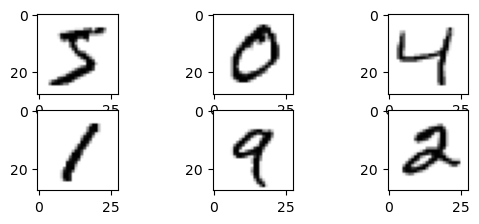

In [5]:
plt.subplot(431)
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.subplot(432)
plt.imshow(x_train[1], cmap=plt.cm.binary)
plt.subplot(433)
plt.imshow(x_train[2], cmap=plt.cm.binary)
plt.subplot(434)
plt.imshow(x_train[3], cmap=plt.cm.binary)
plt.subplot(435)
plt.imshow(x_train[4], cmap=plt.cm.binary)
plt.subplot(436)
plt.imshow(x_train[5], cmap=plt.cm.binary)

In [6]:
x_train=x_train/255
x_test=x_test/255

In [7]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [8]:
print("y_train Shape: %s and value: %s" % (y_train.shape, y_train))
print("y_test Shape: %s and value: %s" % (y_test.shape, y_test))



y_train Shape: (60000,) and value: [5 0 4 ... 5 6 8]
y_test Shape: (10000,) and value: [7 2 1 ... 4 5 6]


In [9]:
ytrain=to_categorical(y_train)
ytest=to_categorical(y_test)



In [10]:
# After one hot encoding
print("y_train Shape: %s and value: %s" % (y_train.shape, y_train[0]))
print("y_test Shape: %s and value: %s" % (y_test.shape, y_test[1]))

y_train Shape: (60000,) and value: 5
y_test Shape: (10000,) and value: 2


In [11]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(layers.Conv2D(64,(3,3),padding='same', activation='relu'))
# model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(layers.Conv2D(128,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))

model.add(layers.Conv2D(256,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(layers.Conv2D(512,(3,3),padding='same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.5))

model.add(layers.Flatten(input_shape=(28,28)))
model.add(layers.Dense(512, activation='relu')) 
model.add(layers.Dense(256, activation='relu')) 
model.add(layers.Dense(10, activation='softmax'))


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 128)         0         
_________________________________________________________________
dropout (Dropout)            (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 256)         2

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy']) 

In [14]:

xtrain2=x_train.reshape(60000,28,28,1)
xtest2=x_test.reshape(10000,28,28,1)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


In [16]:
checkpoint=ModelCheckpoint('mnist_model_1.h5', monitor='val_loss', verbose=1, save_best_only=True)
tensorboard_callback = TensorBoard(log_dir='logs', histogram_freq=1)
history=model.fit(xtrain2,ytrain,epochs=40,batch_size=1000,verbose=True,validation_data=(xtest2,ytest), callbacks=[checkpoint, tensorboard_callback])

Epoch 1/40
60/60 [==============================] - 7s 117ms/step - loss: 0.0285 - accuracy: 0.9911 - val_loss: 0.0278 - val_accuracy: 0.9905

Epoch 00001: val_loss improved from inf to 0.02778, saving model to mnist_model_1.h5
Epoch 2/40
60/60 [==============================] - 7s 117ms/step - loss: 0.0249 - accuracy: 0.9918 - val_loss: 0.0330 - val_accuracy: 0.9899

Epoch 00002: val_loss did not improve from 0.02778
Epoch 3/40
60/60 [==============================] - 7s 116ms/step - loss: 0.0230 - accuracy: 0.9926 - val_loss: 0.0209 - val_accuracy: 0.9928

Epoch 00003: val_loss improved from 0.02778 to 0.02090, saving model to mnist_model_1.h5
Epoch 4/40
60/60 [==============================] - 7s 117ms/step - loss: 0.0191 - accuracy: 0.9942 - val_loss: 0.0207 - val_accuracy: 0.9931

Epoch 00004: val_loss improved from 0.02090 to 0.02069, saving model to mnist_model_1.h5
Epoch 5/40
60/60 [==============================] - 7s 117ms/step - loss: 0.0188 - accuracy: 0.9941 - val_loss: 0.

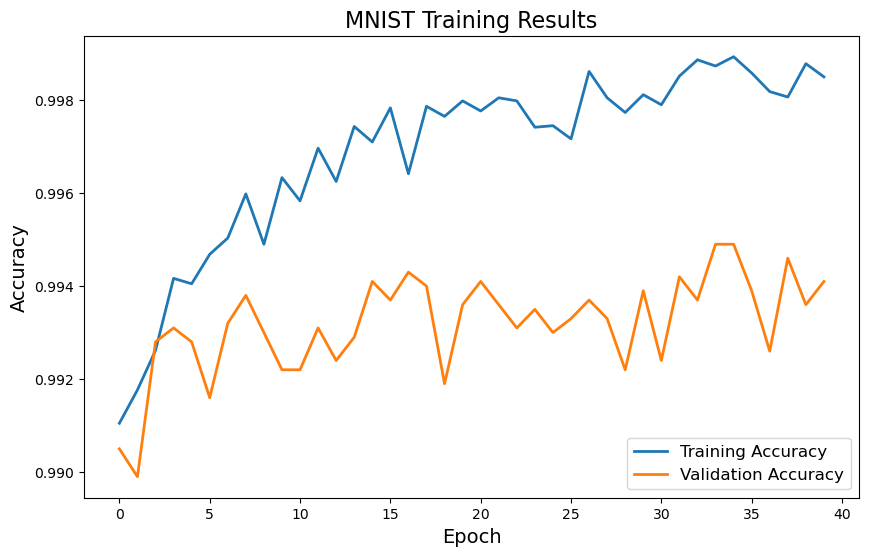

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Accuracy', fontsize=14)
plt.title(f"MNIST Training Results", fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.show()


In [19]:
test_loss, test_acc = model.evaluate(xtest2, ytest)
print("Testing accuracy:", test_acc*100,'%')

313/313 [==============================] - 2s 5ms/step - loss: 0.0219 - accuracy: 0.9941
Testing accuracy: 99.40999746322632 %


In [20]:
predictions=model.predict(xtest2)

print("1. Prediction array: %s" % (predictions[0]))

print("2. Label number having highest confidence in prediction array: %s" % (np.argmax(predictions[0])))

print("3. Actual label in dataset: %s" % (y_test[0]))

1. Prediction array: [9.9046375e-15 2.1713256e-10 2.2679987e-10 3.7548048e-11 4.1259000e-11
 9.9711797e-13 4.2549946e-15 1.0000000e+00 1.9737825e-13 7.8356030e-11]
2. Label number having highest confidence in prediction array: 7
3. Actual label in dataset: 7


In [1]:
class_names=['0','1','2','3','4','5','6','7','8','9']

In [2]:
# creating a funtion which will help to verify the prediction is true of not

def plot_image(i, predictions_array, true_label, img): # taking index and 3 arrays viz. prediction array, true label array and image array
  
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary) # showing b/w image

  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  # print(predicted_label)
  # print(true_label)
  
  if predicted_label == true_label: #setting up label color
    color='blue' # correct then blue colour
    
  else:
    color='red' # wrong then red colour

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)
  
# function to display bar chart showing whether image prediction is how much correct  
def plot_value_array(i, predictions_array, true_label): # taking index along with predictions and true label array
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot=plt.bar(range(10), predictions_array, color='gray')
  plt.ylim([0,1])
  predicted_label=np.argmax(predictions_array)
  true_label=np.argmax(true_label)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

In [3]:
i=7888
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(i, predictions, y_test, x_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions, y_test)
plt.show()

NameError: name 'plt' is not defined

In [ ]:
i=2224 
img = xtest2[i]
print(img.shape)

img=(np.expand_dims(img,0))
print(img.shape)

predictions_single = model.predict(img)
print(predictions_single)

plot_value_array(i, predictions,ytest)
_ = plt.xticks(range(10), class_names,rotation=45)

np.argmax(predictions_single[0])